In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
supermarket_sales = pd.read_csv('supermarket_sales - Sheet1.csv')

In [4]:
supermarket_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [20]:
supermarket_sales.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,2,1,1,1,3,40.35,1,2.0175,42.3675,1/29/2019,13:46,2,40.35,4.761905,2.0175,6.2
996,303-96-2227,1,0,1,0,4,97.38,10,48.6900,1022.4900,3/2/2019,17:16,2,973.80,4.761905,48.6900,4.4
997,727-02-1313,0,2,0,1,2,31.84,1,1.5920,33.4320,2/9/2019,13:22,0,31.84,4.761905,1.5920,7.7
998,347-56-2442,0,2,1,1,4,65.82,1,3.2910,69.1110,2/22/2019,15:33,0,65.82,4.761905,3.2910,4.1
999,849-09-3807,0,2,0,0,1,88.34,7,30.9190,649.2990,2/18/2019,13:28,0,618.38,4.761905,30.9190,6.6


In [23]:
supermarket_sales.shape

(1000, 17)

In [24]:
supermarket_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   int32  
 2   City                     1000 non-null   int32  
 3   Customer type            1000 non-null   int32  
 4   Gender                   1000 non-null   int32  
 5   Product line             1000 non-null   int32  
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   int32  
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [27]:
supermarket_sales.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [28]:
supermarket_sales.isnull().sum()/supermarket_sales.shape[0] * 100

Invoice ID                 0.0
Branch                     0.0
City                       0.0
Customer type              0.0
Gender                     0.0
Product line               0.0
Unit price                 0.0
Quantity                   0.0
Tax 5%                     0.0
Total                      0.0
Date                       0.0
Time                       0.0
Payment                    0.0
cogs                       0.0
gross margin percentage    0.0
gross income               0.0
Rating                     0.0
dtype: float64

In [29]:
supermarket_sales.duplicated().sum()

0

In [31]:
for i in supermarket_sales.select_dtypes(include="object").columns:
    print(supermarket_sales[i].value_counts())
    print("***"*10)

Invoice ID
750-67-8428    1
642-61-4706    1
816-72-8853    1
491-38-3499    1
322-02-2271    1
              ..
633-09-3463    1
374-17-3652    1
378-07-7001    1
433-75-6987    1
849-09-3807    1
Name: count, Length: 1000, dtype: int64
******************************
Date
2/7/2019     20
2/15/2019    19
3/14/2019    18
3/2/2019     18
1/8/2019     18
             ..
1/4/2019      6
2/28/2019     6
2/21/2019     6
3/17/2019     6
2/1/2019      6
Name: count, Length: 89, dtype: int64
******************************
Time
19:48    7
14:42    7
17:38    6
17:16    5
11:40    5
        ..
13:26    1
11:17    1
14:57    1
17:53    1
19:12    1
Name: count, Length: 506, dtype: int64
******************************


In [32]:
supermarket_sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,0,2,0,0,3,74.69,7,26.1415,548.9715,1/5/2019,13:08,2,522.83,4.761905,26.1415,9.1
1,226-31-3081,2,1,1,0,0,15.28,5,3.8200,80.2200,3/8/2019,10:29,0,76.40,4.761905,3.8200,9.6
2,631-41-3108,0,2,1,1,4,46.33,7,16.2155,340.5255,3/3/2019,13:23,1,324.31,4.761905,16.2155,7.4
3,123-19-1176,0,2,0,1,3,58.22,8,23.2880,489.0480,1/27/2019,20:33,2,465.76,4.761905,23.2880,8.4
4,373-73-7910,0,2,1,1,5,86.31,7,30.2085,634.3785,2/8/2019,10:37,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,2,1,1,1,3,40.35,1,2.0175,42.3675,1/29/2019,13:46,2,40.35,4.761905,2.0175,6.2
996,303-96-2227,1,0,1,0,4,97.38,10,48.6900,1022.4900,3/2/2019,17:16,2,973.80,4.761905,48.6900,4.4
997,727-02-1313,0,2,0,1,2,31.84,1,1.5920,33.4320,2/9/2019,13:22,0,31.84,4.761905,1.5920,7.7
998,347-56-2442,0,2,1,1,4,65.82,1,3.2910,69.1110,2/22/2019,15:33,0,65.82,4.761905,3.2910,4.1


In [33]:
supermarket_sales.describe().T

,count,mean,std,min,25%,50%,75%,max
Branch,1000.0,0.988000,0.817633,0.000000,0.000000,1.000000,2.000000,2.000000
City,1000.0,1.008000,0.820127,0.000000,0.000000,1.000000,2.000000,2.000000
Customer type,1000.0,0.499000,0.500249,0.000000,0.000000,0.000000,1.000000,1.000000
Gender,1000.0,0.499000,0.500249,0.000000,0.000000,0.000000,1.000000,1.000000
Product line,1000.0,2.452000,1.715412,0.000000,1.000000,2.000000,4.000000,5.000000
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
Payment,1000.0,1.001000,0.830475,0.000000,0.000000,1.000000,2.000000,2.000000


In [34]:
supermarket_sales.describe(include="object")

,Invoice ID,Date,Time
count,1000,1000,1000
unique,1000,89,506
top,750-67-8428,2/7/2019,19:48
freq,1,20,7


In [5]:
supermarket_sales['Branch'] = LabelEncoder().fit_transform(supermarket_sales['Branch'])
supermarket_sales['City'] = LabelEncoder().fit_transform(supermarket_sales['City'])
supermarket_sales['Gender'] = LabelEncoder().fit_transform(supermarket_sales['Gender'])
supermarket_sales['Customer type'] = LabelEncoder().fit_transform(supermarket_sales['Customer type'])
supermarket_sales['Product line'] = LabelEncoder().fit_transform(supermarket_sales['Product line'])
supermarket_sales['Payment'] = LabelEncoder().fit_transform(supermarket_sales['Payment'])
supermarket_sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,0,2,0,0,3,74.69,7,26.1415,548.9715,1/5/2019,13:08,2,522.83,4.761905,26.1415,9.1
1,226-31-3081,2,1,1,0,0,15.28,5,3.8200,80.2200,3/8/2019,10:29,0,76.40,4.761905,3.8200,9.6
2,631-41-3108,0,2,1,1,4,46.33,7,16.2155,340.5255,3/3/2019,13:23,1,324.31,4.761905,16.2155,7.4
3,123-19-1176,0,2,0,1,3,58.22,8,23.2880,489.0480,1/27/2019,20:33,2,465.76,4.761905,23.2880,8.4
4,373-73-7910,0,2,1,1,5,86.31,7,30.2085,634.3785,2/8/2019,10:37,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,2,1,1,1,3,40.35,1,2.0175,42.3675,1/29/2019,13:46,2,40.35,4.761905,2.0175,6.2
996,303-96-2227,1,0,1,0,4,97.38,10,48.6900,1022.4900,3/2/2019,17:16,2,973.80,4.761905,48.6900,4.4
997,727-02-1313,0,2,0,1,2,31.84,1,1.5920,33.4320,2/9/2019,13:22,0,31.84,4.761905,1.5920,7.7
998,347-56-2442,0,2,1,1,4,65.82,1,3.2910,69.1110,2/22/2019,15:33,0,65.82,4.761905,3.2910,4.1


In [6]:
supermarket_sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,0,2,0,0,3,74.69,7,26.1415,548.9715,1/5/2019,13:08,2,522.83,4.761905,26.1415,9.1
1,226-31-3081,2,1,1,0,0,15.28,5,3.8200,80.2200,3/8/2019,10:29,0,76.40,4.761905,3.8200,9.6
2,631-41-3108,0,2,1,1,4,46.33,7,16.2155,340.5255,3/3/2019,13:23,1,324.31,4.761905,16.2155,7.4
3,123-19-1176,0,2,0,1,3,58.22,8,23.2880,489.0480,1/27/2019,20:33,2,465.76,4.761905,23.2880,8.4
4,373-73-7910,0,2,1,1,5,86.31,7,30.2085,634.3785,2/8/2019,10:37,2,604.17,4.761905,30.2085,5.3


In [10]:
supermarket_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   int32  
 2   City                     1000 non-null   int32  
 3   Customer type            1000 non-null   int32  
 4   Gender                   1000 non-null   int32  
 5   Product line             1000 non-null   int32  
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   int32  
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

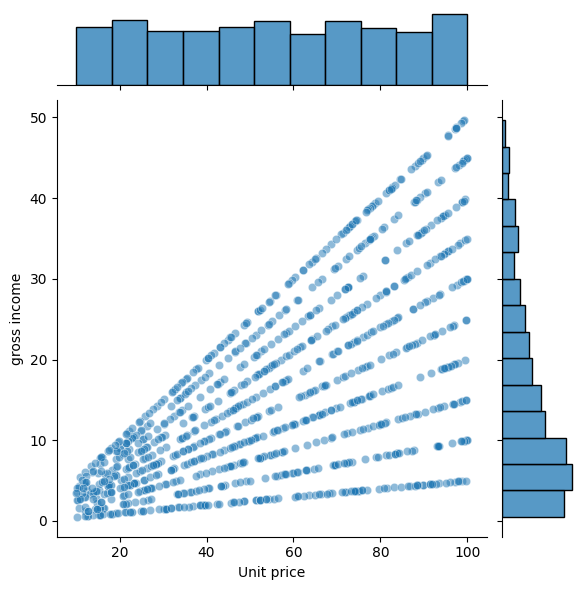

In [16]:
sns.jointplot(x='Unit price', y='gross income', data=supermarket_sales, alpha=0.5)

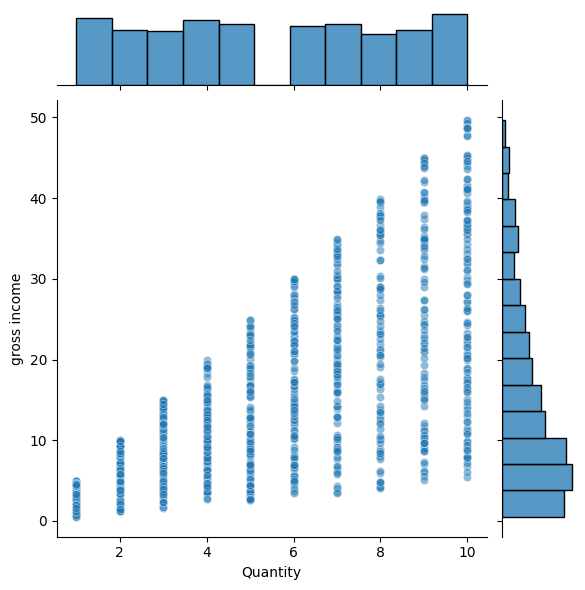

In [17]:
sns.jointplot(x='Quantity', y='gross income', data=supermarket_sales, alpha=0.5)